<a href="https://colab.research.google.com/github/Ameerpeta-Srinidh/fmml-Assignments/blob/main/Module_01_Lab_01_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting features from data

Module 1, Lab 1<br>



In [1]:
! pip install wikipedia
! pip install goodreads

import wikipedia
import goodreads
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=ae4aedbb7507036a7bc0ab66dd65d02b253a52adaa1a30296eb54c367e856672
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 2.8 MB/s eta 0:00:00
  Created wheel for goodreads: filename=goodreads-0.3.2-py3-none-any.whl size=13099 sha256=84699d220d4398e721430140b8160d816e99862595cd41b7152f43c0745cc7b3
  Stored in directory: /root/.cache/pip/wheels/18/77/37/00d5a485835ab56562cc76db74e669cc08fbb0faeb107ae9ff
  Created wheel for rauth: filename=rauth-0.7.3-py3-none-any.whl size=16058 sha256=4b7ee62e66f5625b909e6f984407703d8431b767ee8900d19222f04c6fb5bcf9
  Stored in directory: /root/.cache/pip/wheels/73/f1/e3/dbb192d15a0eff9f22caac2d25c202b4a0ad20

# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features.

Let us download a few documents off Wikipedia.

In [2]:
topic1 = 'Polar Bear'
topic2 = 'Jaguar'

wikipedia.set_lang('en')

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang('fr')

fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content

This is what the text looks like:

In [37]:
topic3 = 'Dua Lipa'
topic4= 'Cobra'

wikipedia.set_lang('es')

es1 = wikipedia.page(topic3).content
es2 = wikipedia.page(topic4).content

wikipedia.set_lang('ko')

ko1 = wikipedia.page(topic3).content
ko2 = wikipedia.page(topic4).content

In [38]:
ko1

'Dua Lipa는 영국의 가수 두아 리파의 데뷔 정규음반이다. 2017년 6월 2일에 워너 브라더스 레코드 레이블을 통하여 발매되었다. 영국 앨범 차트 3위 음반이자, 영국 축음기 협회(BPI) 인증 플래티넘 등급 음반이다.'

In [39]:
ko2

'코브라(COBRA 또는 Cobra, 주로 CoBrA로 양식화됨)는 1948년부터 1951년까지 활동했던 유럽의 아방가르드 예술 그룹이다. 코브라(COBRA)라는 명칭은 1948년 벨기에의 화가이자 시인인 크리스티안 도트르몽이 회원국들의 수도인 코펜하겐(Co), 브뤼셀(Br), 암스테르담(A)의 이니셜을 따서 지었다. 따라서 주로 CoBrA로 적는다.\n\n\n== 역사 ==\n제2차 세계 대전 당시 네덜란드는 국경 너머의 예술계와 단절되어 있었는데 그 후 곧 CoBrA가 결성되었다. 실험적으로 작업한 이러한 국제적인 예술가 운동은 서구 사회에 대한 비판과 "혐오스러운" 자연주의와 "개성이 부족한" 추상주의 등 기존 예술 운동에서 벗어나려는 공통된 욕구에서 발전했다. 콘스탄트에 따르면 실험은 제한받지 않는 자유의 상징이었으며, 이는 궁극적으로 아이들과 아이들의 표현을 통해 구체화되었다고 한다. CoBrA는 1948년 11월 파리의 Café Notre-Dame에서 도트르몽이 작성한 선언문 《La cause était entendue》(사건은 해결되었다)에 카렐 아펠, 콘스탄트, 코르네유, 크리스티안 도트르몽, 아스거 요른 및 조셉 느와레 등의 예술가들이 서명하면서 결성되었다. 색채와 형태의 완전한 자유와 초현실주의에 대한 반감으로 형성된 이 예술가들은 마르크스주의와 모더니즘에 대한 관심도 공유했다.그들의 작업 방식은 자발성과 실험에 기반한 것이었으며, 특히 어린이의 그림, 원시 예술 형식 및 파울 클레와 호안 미로의 작품에서 영감을 얻었다.네덜란드의 그룹 Reflex와 덴마크의 그룹 Høst, 그리고 벨기에의 혁명적 초현실주의 그룹이 합쳐져 만들어진 CoBrA는 그리 길지 않은 기간 동안 존재했했지만, 정기 간행물인 Cobra를 출판거나, 다양한 멤버가 협업하여 만든 Peintures-Mot 시리즈, 그리고 두 개의 대규모 전시회를 여는 등 많은 활동을 했다. 첫 번째 행사는 1949년 11월 암스테르담의 암스테르담 시립 미술관에서 열렸고, 두 번째 행사는 19

In [4]:
fr1

"Polar BEAR  ou P87-1 est un petit satellite scientifique militaire américain développé pour étudier l'ionosphère. L'objectif de sa mission est d'analyser les interférences dans les communications créées par les éruptions solaires et les aurores boréales pour fournir des pistes permettant d'améliorer le fonctionnement des communications militaires dans les régions polaires. Cette mission succède à HILAT qui remplit les mêmes objectifs. Le satellite est conçu par le laboratoire Applied Physics Laboratory de l'université Johns-Hopkins pour répondre aux besoins du département de la Défense des États-Unis et placé en orbite en 1987. Il a été réalisé en modifiant le satellite Transit-O17 développé initialement pour le système de positionnement par satellites Transit.\n\n\n== Caractéristiques techniques ==\nPolar BEAR est un petit satellite de 118 kilogrammes conçu en modifiant un satellite Transit-O16 développé initialement pour le système de positionnement par satellites Transit. Il est st

In [5]:
fr2

"Le jaguar (Panthera onca) est un mammifère carnivore de la famille des Felidae. C'est l'un des cinq « grands félins » du genre Panthera, avec le léopard, le tigre, le lion et la panthère des neiges. Son aire de répartition actuelle s'étend du Mexique à la majeure partie de l'Amérique centrale et de l'Amérique du Sud, jusqu'au nord de l'Argentine et du Paraguay. Hormis des errances occasionnelles de spécimens originaires du Mexique, le jaguar est une espèce disparue aux États-Unis depuis le début des années 1970. Il est présent à l'état sauvage en Guyane française.\nCe félin tacheté ressemble physiquement au léopard, mais il est généralement plus grand et d'apparence plus massive. En outre, son habitat et son comportement sont plus proches de ceux du tigre. Bien que la forêt tropicale dense constitue son habitat de prédilection, le jaguar s'accommode d'une large variété de milieux ouverts et boisés. Il est fortement associé à la présence de l'eau et, comme le tigre, il aime nager. C'es

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [6]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [7]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
es1=cleanup(es1)
es2=cleanup(es2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)
ko1=cleanup(ko1)
ko2=cleanup(ko2)

In [8]:
print(eng1)

theinternationalpolaryearsipyarecollaborativeinternationaleffortswithintensiveresearchfocusonthepolarregionskarlweyprechtanaustrohungariannavalofficermotivatedtheendeavorinbutdiedbeforeitfirstoccurredinfiftyyearslaterasecondipytookplacetheinternationalgeophysicalyearwasinspiredbytheipyandwasorganizedyearsafterthefirstipythefourthandmostrecentipycoveredtwofullannualcyclesfrommarchtomarchthefirstinternationalpolaryearthefirstinternationalpolaryearwasproposedbyanaustrohungariannavalofficerkarlweyprechtinandorganizedbygeorgneumayerdirectorofthegermanmaritimeobservatoryratherthansettlingfortraditionalindividualandnationaleffortstheypushedforacoordinatedscientificapproachtoresearchingarcticphenomenaobserversmadecoordinatedgeophysicalmeasurementsatmultiplelocationsinthearcticduringthesameyearenablingmultipleviewsofthesamephenomenaallowingbroaderinterpretationoftheavailabledataandvalidationoftheresultsobtainedittooksevenyearstoorganizethefirstipywhichhadelevenparticipatingnationstheaustrohunga

In [9]:
print(eng2)

thejaguarpantheraoncaisalargecatspeciesandtheonlylivingmemberofthegenuspantherathatisnativetotheamericaswithabodylengthofuptomftinandaweightofuptokglbitisthebiggestcatspeciesintheamericasandthethirdlargestintheworlditsdistinctivelymarkedcoatfeaturespaleyellowtotancoloredfurcoveredbyspotsthattransitiontorosettesonthesidesalthoughamelanisticblackcoatappearsinsomeindividualsthejaguarspowerfulbiteallowsittopiercethecarapacesofturtlesandtortoisesandtoemployanunusualkillingmethoditbitesdirectlythroughtheskullofmammalianpreybetweentheearstodeliverafatalblowtothebrainthemodernjaguarsancestorsprobablyenteredtheamericasfromeurasiaduringtheearlypleistoceneviathelandbridgethatoncespannedtheberingstraittodaythejaguarsrangeextendsfromthesouthwesternunitedstatesacrossmexicoandmuchofcentralamericatheamazonrainforestandsouthtoparaguayandnorthernargentinaitinhabitsavarietyofforestedandopenterrainsbutitspreferredhabitatistropicalandsubtropicalmoistbroadleafforestwetlandsandwoodedregionsitisadeptatswimmin

In [40]:
print(ko1)

Dua Lipa는 영국의 가수 두아 리파의 데뷔 정규음반이다. 2017년 6월 2일에 워너 브라더스 레코드 레이블을 통하여 발매되었다. 영국 앨범 차트 3위 음반이자, 영국 축음기 협회(BPI) 인증 플래티넘 등급 음반이다.


In [41]:
print(ko2)

코브라(COBRA 또는 Cobra, 주로 CoBrA로 양식화됨)는 1948년부터 1951년까지 활동했던 유럽의 아방가르드 예술 그룹이다. 코브라(COBRA)라는 명칭은 1948년 벨기에의 화가이자 시인인 크리스티안 도트르몽이 회원국들의 수도인 코펜하겐(Co), 브뤼셀(Br), 암스테르담(A)의 이니셜을 따서 지었다. 따라서 주로 CoBrA로 적는다.


== 역사 ==
제2차 세계 대전 당시 네덜란드는 국경 너머의 예술계와 단절되어 있었는데 그 후 곧 CoBrA가 결성되었다. 실험적으로 작업한 이러한 국제적인 예술가 운동은 서구 사회에 대한 비판과 "혐오스러운" 자연주의와 "개성이 부족한" 추상주의 등 기존 예술 운동에서 벗어나려는 공통된 욕구에서 발전했다. 콘스탄트에 따르면 실험은 제한받지 않는 자유의 상징이었으며, 이는 궁극적으로 아이들과 아이들의 표현을 통해 구체화되었다고 한다. CoBrA는 1948년 11월 파리의 Café Notre-Dame에서 도트르몽이 작성한 선언문 《La cause était entendue》(사건은 해결되었다)에 카렐 아펠, 콘스탄트, 코르네유, 크리스티안 도트르몽, 아스거 요른 및 조셉 느와레 등의 예술가들이 서명하면서 결성되었다. 색채와 형태의 완전한 자유와 초현실주의에 대한 반감으로 형성된 이 예술가들은 마르크스주의와 모더니즘에 대한 관심도 공유했다.그들의 작업 방식은 자발성과 실험에 기반한 것이었으며, 특히 어린이의 그림, 원시 예술 형식 및 파울 클레와 호안 미로의 작품에서 영감을 얻었다.네덜란드의 그룹 Reflex와 덴마크의 그룹 Høst, 그리고 벨기에의 혁명적 초현실주의 그룹이 합쳐져 만들어진 CoBrA는 그리 길지 않은 기간 동안 존재했했지만, 정기 간행물인 Cobra를 출판거나, 다양한 멤버가 협업하여 만든 Peintures-Mot 시리즈, 그리고 두 개의 대규모 전시회를 여는 등 많은 활동을 했다. 첫 번째 행사는 1949년 11월 암스테르담의 암스테르담 시립 미술관에서 열렸고, 두 번째 행사는 1951년 리

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [10]:
# convert a tuple of characters to a string
def tuple2string(tup):

  return ''.join(tup)

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

Let us compare the histograms of English pages and French pages. Can you spot a difference?

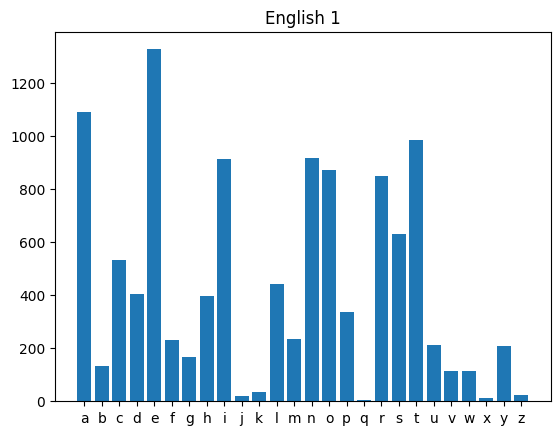

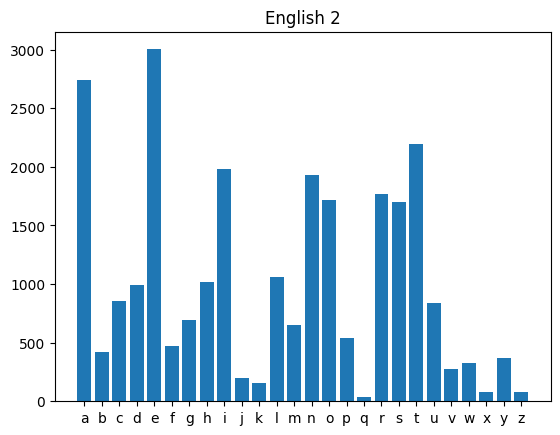

In [11]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

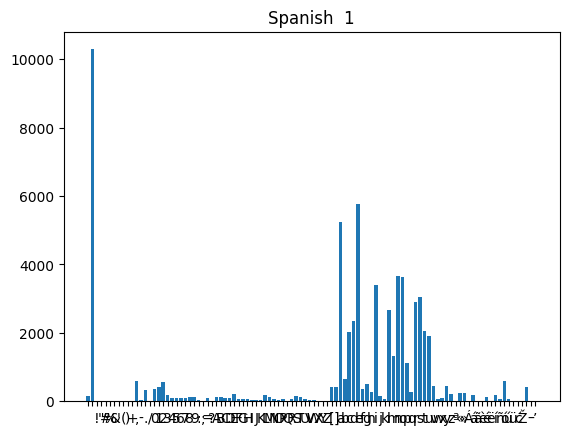

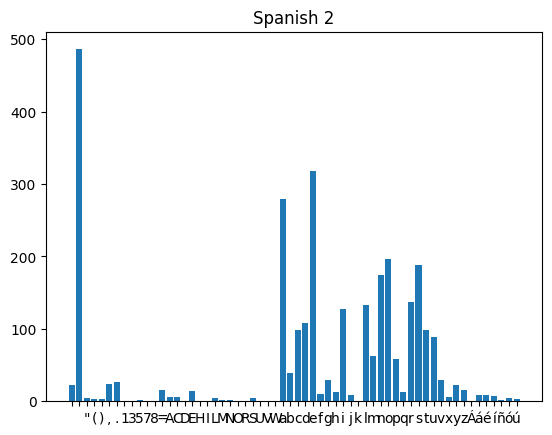

In [42]:
unigram_es1 = Counter(ngrams(es1,1))
plothistogram(unigram_es1)
plt.title('Spanish  1')
plt.show()
unigram_es2 = Counter(ngrams(es2,1))
plothistogram(unigram_es2)
plt.title('Spanish 2')
plt.show()

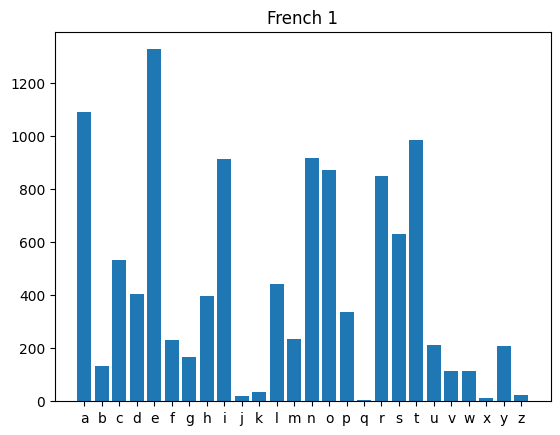

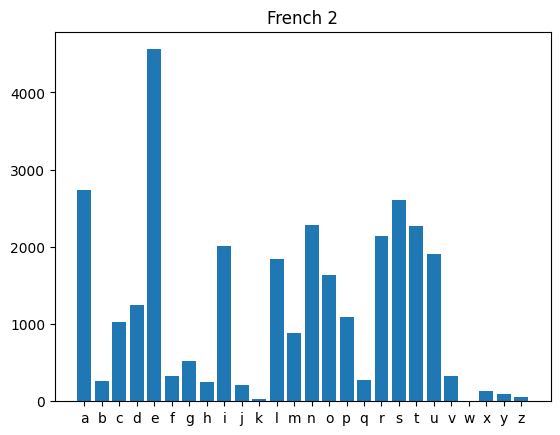

In [12]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 44508 (\N{HANGUL SYLLABLE GYU}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 44553 (\N{HANGUL SYLLABLE GEUB}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 45320 (\N{HANGUL SYLLABLE NEO}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Gly

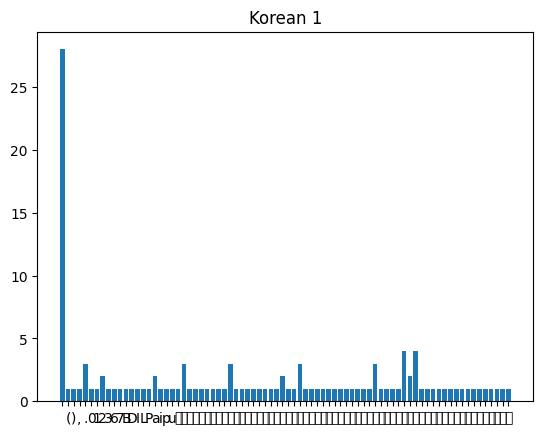

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 12298 (\N{LEFT DOUBLE ANGLE BRACKET}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 12299 (\N{RIGHT DOUBLE ANGLE BRACKET}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 44052 (\N{HANGUL SYLLABLE GASS}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: Us

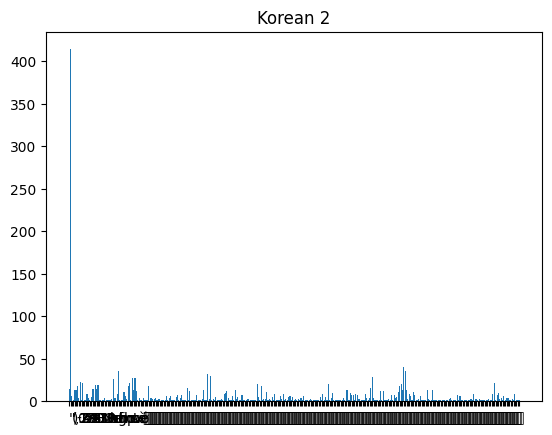

In [43]:
unigram_ko1 = Counter(ngrams(ko1,1))
plothistogram(unigram_ko1)
plt.title('Korean 1')
plt.show()
unigram_ko2 = Counter(ngrams(ko2,1))
plothistogram(unigram_ko2)
plt.title('Korean 2')
plt.show()

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

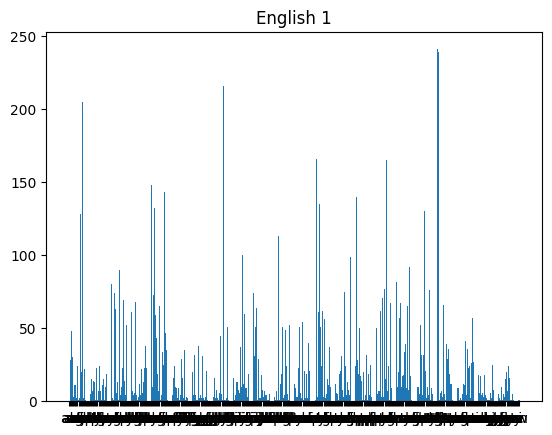

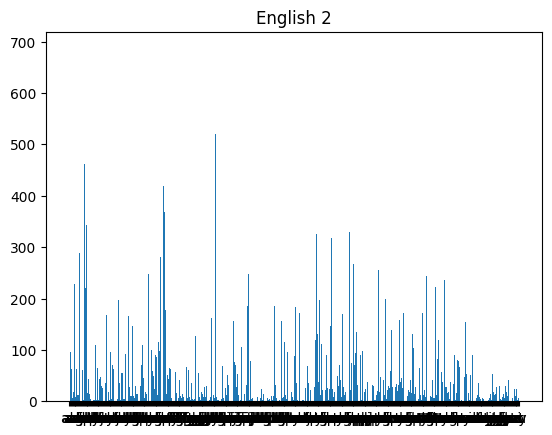

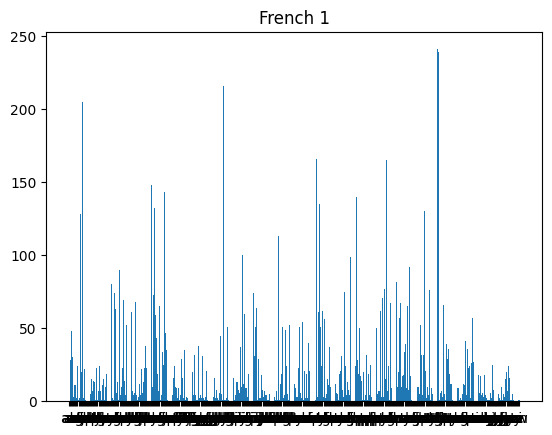

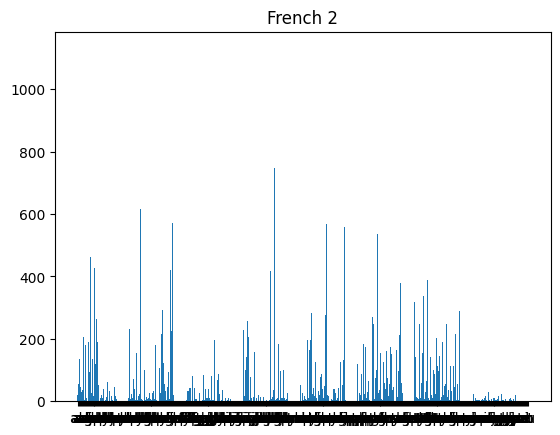

In [13]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [14]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

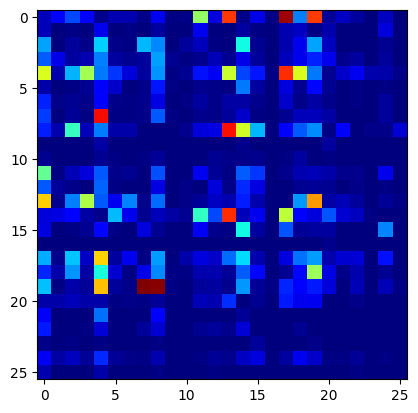

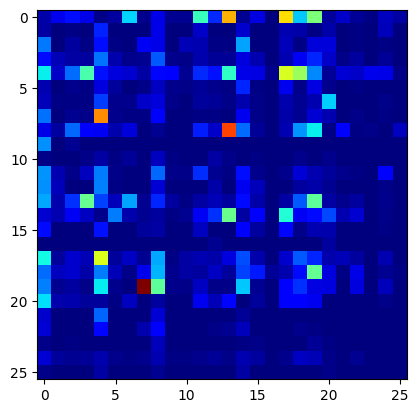

In [15]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)
plt.show()

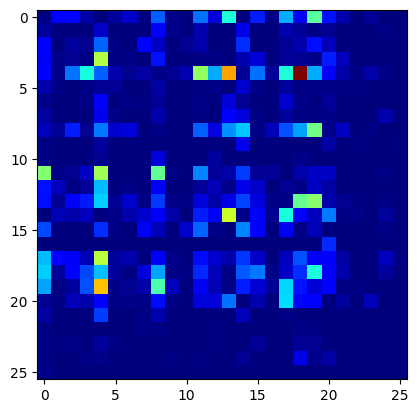

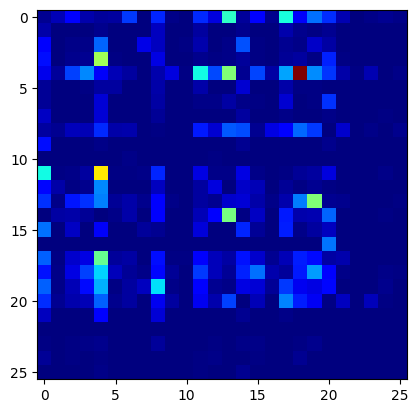

In [16]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

Let us look at the top 10 ngrams for each text.

In [17]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [18]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


English 1:
('t', 'h') : 241.0
('t', 'i') : 239.0
('a', 'r') : 234.0
('h', 'e') : 216.0
('i', 'n') : 215.0
('o', 'n') : 208.0
('e', 'r') : 208.0
('a', 'n') : 205.0
('a', 't') : 204.0
('n', 't') : 179.0

English 2:
('t', 'h') : 685.0
('i', 'n') : 575.0
('h', 'e') : 520.0
('a', 'n') : 494.0
('a', 'r') : 461.0
('r', 'e') : 421.0
('e', 'r') : 418.0
('e', 's') : 369.0
('a', 't') : 344.0
('o', 'n') : 329.0

French 1:
('e', 's') : 187.0
('e', 'n') : 138.0
('t', 'e') : 132.0
('o', 'n') : 112.0
('r', 'e') : 108.0
('d', 'e') : 106.0
('l', 'e') : 102.0
('e', 'l') : 99.0
('n', 't') : 97.0
('l', 'a') : 95.0

French 2:
('e', 's') : 1128.0
('l', 'e') : 748.0
('d', 'e') : 616.0
('e', 'n') : 572.0
('n', 't') : 569.0
('o', 'n') : 557.0
('r', 'e') : 536.0
('a', 'n') : 461.0
('a', 'r') : 428.0
('e', 'l') : 422.0


We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [19]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Extract a subset of the data for our experiment:

In [20]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

Let us visualize a few images here:

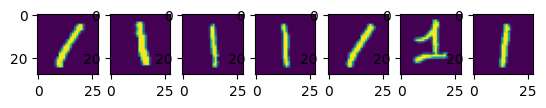

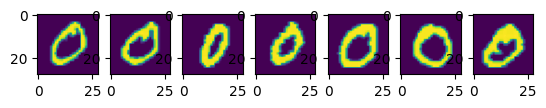

In [21]:
for ii in range(7):
  plt.subplot(1, 7, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(7):
  plt.subplot(1, 7, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

suNow, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [22]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

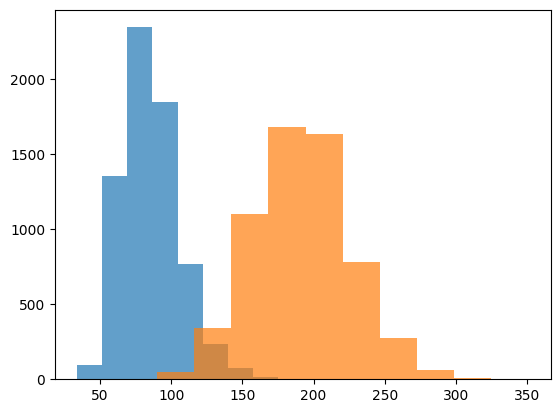

In [23]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [24]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

Visualize a few:

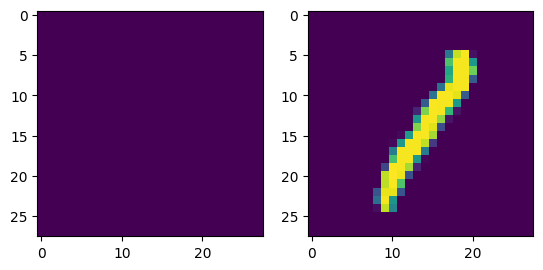

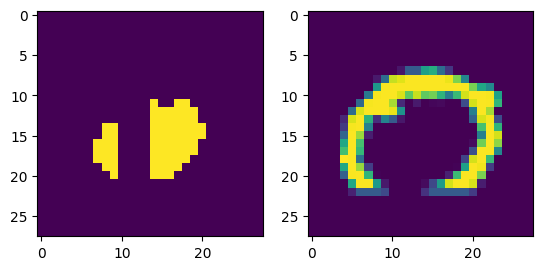

In [25]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

In [ ]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [27]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

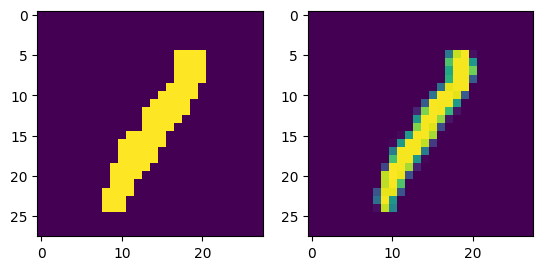

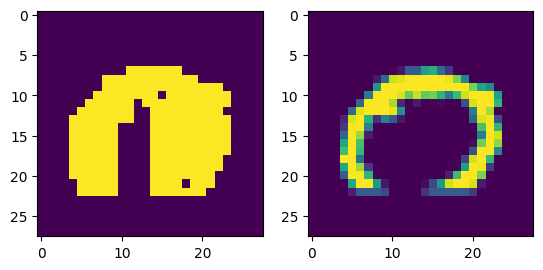

In [28]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

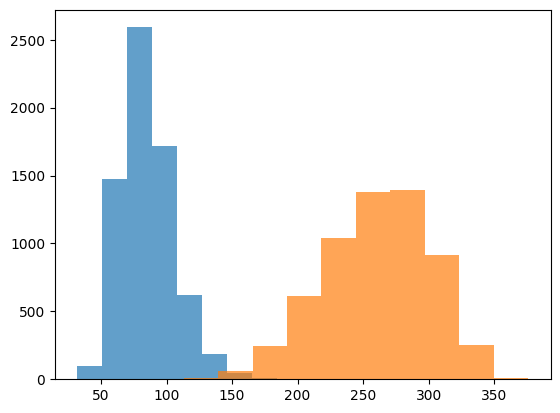

In [29]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [30]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

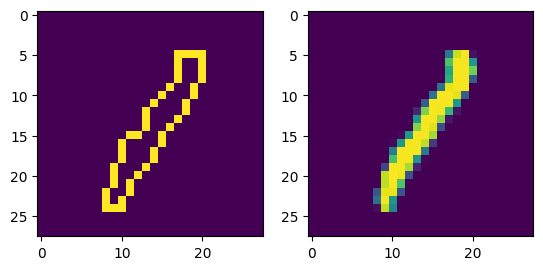

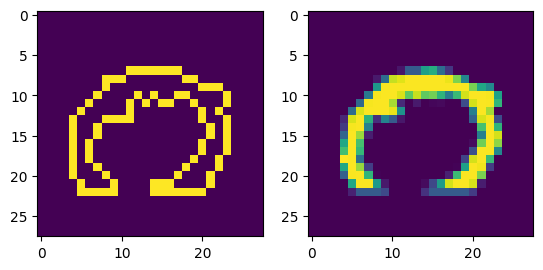

In [31]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

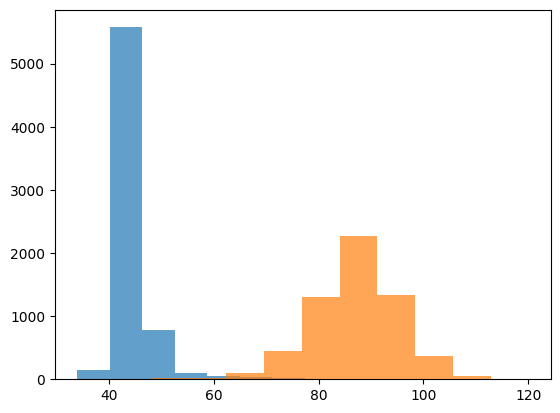

In [32]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

What will happen if we plot two features together?

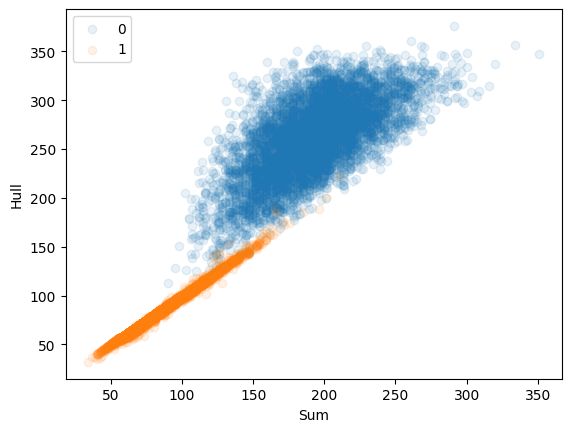

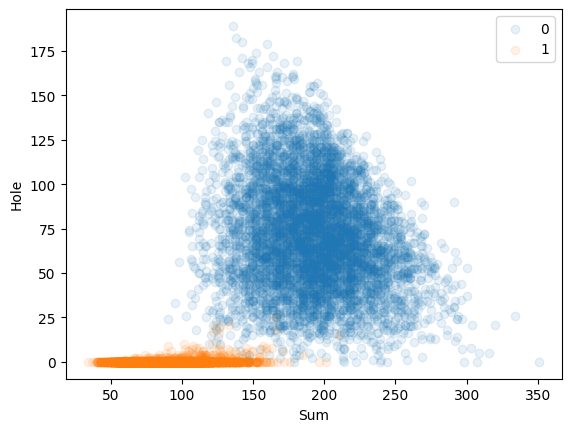

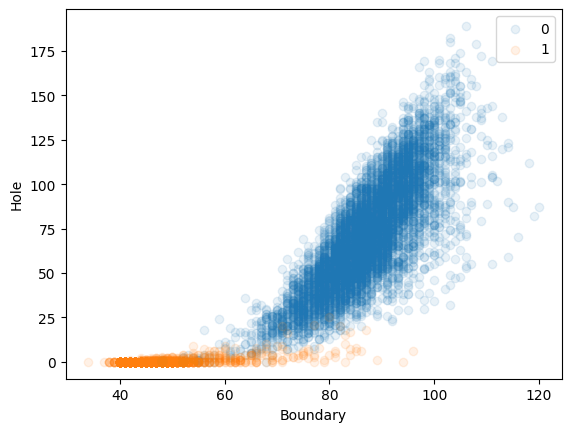

In [33]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

Now let us try plotting 3 features together.

In [34]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)),
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

Feel free to explore the above graph with your mouse.


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?